# Video Game Sales: A Case Study
Join the researchers **`Joaquin O. Escarraga`**, **`Marius C. Laggui`** and **`Renji David Ong`** as they tackle a case study on the global phenomenon of **Video Games**. Find out how the trends and, at the time, technological capabilities affected the **Sales** of all the different games available per console.

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans

## Dataset: The Video Game Sales Dataset

For this notebook, the researchers will work on a dataset called `video game sales,` obtained from https://www.kaggle.com/gregorut/videogamesales. The dataset contains a list of video games with sales greater than 100,000 copies and are over 16,500 records. These records were generated by a scrape of https://www.vgchartz.com/gamedb/.

Inside the `.csv` file in Excel, it is visible that the dataset contains 16,598 **observations** (rows) across 11 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`Rank`**: Ranking of overall sales
- **`Name`**: The games name
- **`Platform`**: Platform of the games release (i.e. `PC`, `PS4`, etc.)
- **`Year`**: Year of the game's release
- **`Genre`**: Genre of the game
- **`Publisher`**: Publisher of the game
- **`NA_Sales`**: Sales in North America (in millions)
- **`EU_Sales`**: Sales in Europe (in millions)
- **`JP_Sales`**: Sales in Japan (in millions)
- **`Other_Sales`**: Sales in the rest of the world (in millions)
- **`Global_Sales`**: Total worldwide sales.

Below is the interpretation of the dataset.

In [2]:
vgsales_df = pd.read_csv("vgsales.csv")

Displayed below is the general information about the dataset with the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, which displays general information about the dataset.

In [3]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Cleaning the Dataset
As this Dataset was a result of scraping, it will contain missing or irrelevant information. It is important that it is cleaned before diving deeper into the Notebook. Below is how the researchers removed some variables that are irrelevant and are not required for any of the researcher's **Exploratory Data Analysis** and **Investigations and Inferences**. 

- **`Rank`**: No analysis will be done based on the sales rank of a game.
- **`Year`**: Some of the entries have years that are beyond `2016` which should not be possible as this Dataset was published last 2016.



In [4]:
# Removing the Rank variable
vgsales_df = vgsales_df.drop(["Rank"], axis=1) 

# Removing Years that are greater than 2016
vgsales_df = vgsales_df[vgsales_df.Year < 2017]
vgsales_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


After the cleaning of the dataset, all the remaining information could be used for further analysis. 

## Exploratory Data Analysis 

Video games have increasingly become popular in recent years. The researchers have decided that looking at video game trends/details could be used to determine what new games would match the interest of the community. This research would be aimed towards the gaming community and video game companies to help increase the sales of upcoming games.  

### **Among all the consoles, which platform is more preferred for the Action genre?**

In [5]:
#Removes the columns of the unnecessary data
preferred_df = vgsales_df.drop(["Year", "Publisher","NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"], axis=1) 

#Collects data with a Genre of Action
preferred_df = preferred_df[preferred_df['Genre'] == 'Action']

#Sums the Global Sales
preferred_df = preferred_df.groupby("Platform").sum()
preferred_df

,Global_Sales
Platform,
2600,26.39
3DS,56.61
DC,1.26
DS,114.19
GB,7.92
GBA,54.26
GC,37.25
GEN,2.74
N64,29.44


Shown above are the different `Platforms` with their respective `Global_Sales` in terms of the `Action` `Genre`. Displayed below is the visualization as to how this data actually looks like in a graph.

Text(0.5, 1.0, 'Platform vs Action Genre Sales')

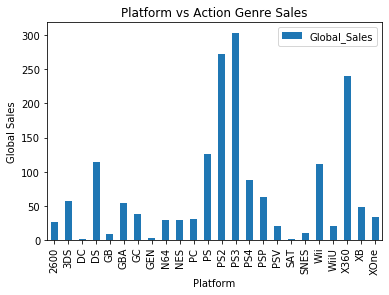

In [6]:
#Creates the bar graph
preferred_df.plot.bar()
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.title('Platform vs Action Genre Sales')

The graph clearly shows that the `PS3` console dominates the `Action` `Genre` in terms of sales followed by `PS2` then `Xbox360`.

###  **Which genre has the most sales globally?**

In [7]:
#Removes the columns of the unnecessary data
sales_df = vgsales_df.drop(["Year", "Publisher","NA_Sales","EU_Sales", "JP_Sales", "Other_Sales","Platform"], axis=1) 

#Sums the Global Sales
sales_df = sales_df.groupby("Genre").sum()
sales_df

,Global_Sales
Genre,
Action,1722.87
Adventure,234.80
Fighting,444.05
Misc,797.62
Platform,829.15
Puzzle,242.22
Racing,726.77
Role-Playing,923.80
Shooter,1026.20


Here the researchers created a summary as to how much each `Genre` has in terms of `Global Sales`. This was done by grouping the sales by `Genre` and then getting the total sum. To visualize the data better, the researchers have created the graph below.

Text(0.5, 1.0, 'Genre vs Sales in consoles')

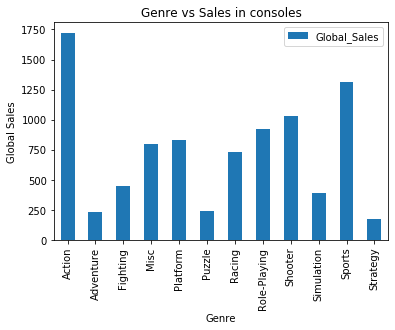

In [8]:
#Creates the bar graph
sales_df.plot.bar()
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Genre vs Sales in consoles')

The graph shows that the `Genre` with the highest sales globally across all `Platforms` is `Action` followed by `Sports` and `Shooter`.

### Which genres are the most prevalent in each platform?

In [9]:
#Removes the columns of the unnecessary data
publisher_df = vgsales_df.drop(["Year","NA_Sales","EU_Sales", "JP_Sales", "Other_Sales","Publisher"], axis=1) 

#Sums the Global Sales

sp1, elements = plt.subplots(6,6)


platArr = vgsales_df["Platform"].unique()

row = 0
col = 0

for i in platArr:
    publisher_df[publisher_df["Platform"] == i].groupby("Genre").sum().plot(ax=elements[row,col], figsize=(110,150), kind='bar',  color="#16E4D1", fontsize=70)
    elements[row][col].set_xlabel("Genre", fontsize=70,  color="#2110E3")
    elements[row][col].set_ylabel("Number of Sales", fontsize=70,  color="#2110E3")
    elements[row][col].set_title(i, fontsize=100,  color="#000000")
    
    col+=1    
    if col == 6:
        row+= 1
        col = 0 

sp1.tight_layout(pad=5.0)

To find out which `Genre` is the most popular per `Platform`, the researchers first grouped the different `Platforms` individually and identified which `Genre` had the highest sales. The different graphs above shows a visualization as to which ones were the most prevalent. Here are the researchers':

For the `Wii` it was `Sports`, `NES` was `Platform`, `GB` was `Role-playing`, `DS` had mostly `Miscellaneous` games, `X360` was `Shooter`, `PS3` was `Action`, `PS2` was `Action`, `SNES` was `Platform`, `GBA` was `Platform`, `3DS` was `Role-playing`, `PS4` was `Action`,`N64` was `Racing`, `PS` was `Action`, `XB` was shooter, `PC` was `Shooter`, `2600` was `Action`, `PSP` was `Action`, `XOne` was `Shooter`, `GC` was `Action`, `WiiU` was `Platform`, `GEN` was `Platform`, `DC` was `Sports`, `PSV` was `Action`, `SAT` was `Fighting`, `SCD` was `Platform`, `WS` was `Role-playing`, `NG` was `Fighting`, `TG16` was `Adventure`, `3DO` was `Adventure`, `GG` was `Platform`, and finally the `PCFX` was `Role-playing`.

## Investigations and Inferences

After performing a comprehensive exploratory data analysis, the researchers can further understand the dataset through **Investigations and Inferences** using methods available within their scope. Wthis this, perhaps the researchers can discover something new about the dataset while having a statistical and factual basis. The two approaches involves the `Independent two-sample t-test`, as well as the `Cluster Analysis` method.


### **I&I #1. Is there a significant difference in sales between the PS3 and PS2 platform in the Action genre?**



In formulating this question , the researchers would like to generate an answer for the community to find out if better graphics means better sales for a certain game. Aside from that, the researchers created this question to find out if sales for a newer and better generation of consoles would yield better sales than the previous generation.

Consider the possible relationship between the two platforms, will there be a significant difference even though one is just the next generation of the other? For this question the researchers first wanted to get the rows having a `Genre` of `Action` and their `Platform` being either `PS3` or `PS2`. Then use a sample size of `100` for this test. 

For this test, the researches have decided to use a **significance level** `$\alpha$` of `0.10` to allow a 10% risk of concluding that a difference exists when there is no actual difference. The $\alpha$ was chosen because the data lacks stronger evidence to support this type of question and can only rely on the raw number of sales without external factors (i.e. `Hype`, `Marketing`, `Competition`, etc).

In [10]:
#Removes the columns of the unnecessary data
action_df = vgsales_df.drop(["Year", "Publisher","NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"], axis=1) 

#Removes the rows of the unnecessary data
action_df = action_df[(action_df['Genre'] == 'Action') & ((action_df['Platform'] == 'PS3') | (action_df['Platform'] == 'PS2'))]

n = 300 # sample size

action_sample_df = action_df.sample(n)
action_sample_df.head()

,Name,Platform,Genre,Global_Sales
2985,Prince of Persia: The Two Thrones,PS2,Action,0.68
5036,The Incredible Hulk,PS2,Action,0.38
7687,Forgotten Realms: Demon Stone,PS2,Action,0.20
3837,Metal Gear Solid 2: Substance,PS2,Action,0.52
8268,Ice Age: Dawn of the Dinosaurs,PS2,Action,0.17


In [11]:
n = action_sample_df.shape[0]

agg = action_sample_df.agg({"Global_Sales": ["mean", "median", "std"]})

sample_mean = agg.loc["mean"][0]
sample_median = agg.loc["median"][0]
sample_std = agg.loc["std"][0]

agg

,Global_Sales
mean,0.855000
median,0.340000
std,1.795591


Below is a boxplot to compare the two groups:

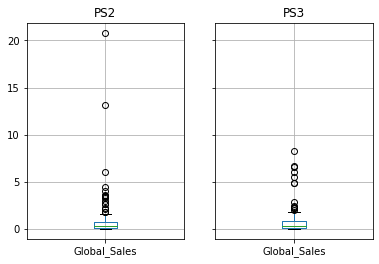

In [12]:
action_sample_df.groupby("Platform").boxplot(column="Global_Sales")
plt.show()

The researchers now get the `Mean`, `Median` and `Standard Deviation` of both the `PS2` and `PS3` for a further inspection of the similarities between the two `Platforms`.

In [13]:
agg = action_sample_df.groupby("Platform").agg({"Global_Sales": ["mean", "median", "std"]})
agg

Global_Sales                 
                 mean median       std
Platform                              
PS2          0.974545  0.360  2.291734
PS3          0.761071  0.335  1.277707

The researchers first formulate the null hypothesis $H_0$, which is determining if the true difference of the sales between `PS2` and `PS3` is zero, which means that there is no difference between the sales of the two platforms. The alternative hypothesis $H_1$, is basically the true difference of the sales between `PS2` and `PS3` is not zero, which means there is a significant difference between the sales of the two platforms.

$H_0$ (null hypothesis): The true difference of the sales between PS2 and PS3 is zero

$H_1$ (alternative hypothesis): The true difference of the sales between PS2 and PS3 is not zero 

In testing the hypothesis, the researchers will use a independent two-sample t-test. The level of significance that  the researchers used is 0.1. The researchers chose this level of significance because

In [14]:
ttest_ind(action_sample_df[action_sample_df["Platform"] == "PS2"]["Global_Sales"],
          action_sample_df[action_sample_df["Platform"] == "PS3"]["Global_Sales"],
          equal_var = False)

Ttest_indResult(statistic=0.959439130633715, pvalue=0.33853340078307037)

**Conclusion:** With a `p-value` of `0.088`,  the data indicates a strong evidence to reject $H_0$ because it is less than the **significance level** $\alpha$ of `0.10`. Meaning that there is a difference of sales between the `PS2` and `PS3` console. Even though they are from the same Publisher, it could be that there were more exclusive titles released for the `PS3` that blew up the franchise. 

There is also a `10%` possibility that it is a **`Type 1 Error`** and we have rejected a true null hypothesis this is because the sample statistics are not perfect estimates of the `Video Game Sales` population.

### **I&I #2. Determining the most prevalent genre by clusters of years using k-means.**

In formulating this question, the researchers were curious on which genres were the most prevalent or popular between the years. This piqued the researcher's interests to find out how the interests of the gaming community changed as time passed by. Lastly, it's to help future game developers to determine which genres are the current interests of the gaming community.

The first thing that the researchers did was to cluster the games based on the release date. The researchers used the library sklearn.cluster in order to use the function fit_predict(), which will cluster the dataset by the years. For clustering, n = 5 is used since that number clustered the years in the best way possible.

In [15]:
clust_df = vgsales_df

kmeans = KMeans(n_clusters=5, random_state=1)
clusters = kmeans.fit_predict(clust_df[["Year"]])
clust_df["Cluster"] = clusters
clust_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1


After clustering, 4 dataframes were made for each cluster in order to plot the numbers of games prevalent in that certain cluster of years.

In [16]:
clust_df0 = clust_df.query("Cluster == 0").sort_values("Year", ascending=False)
clust_df1 = clust_df.query("Cluster == 1").sort_values("Year", ascending=False)
clust_df2 = clust_df.query("Cluster == 2").sort_values("Year", ascending=False)
clust_df3 = clust_df.query("Cluster == 3").sort_values("Year", ascending=False)
clust_df4 = clust_df.query("Cluster == 4").sort_values("Year", ascending=False)

clust_df0["Genre"].value_counts()#Action "2006-2011"
clust_df1["Genre"].value_counts()#Action "1991-1999"
clust_df2["Genre"].value_counts()#Sports "2000-2005"
clust_df3["Genre"].value_counts()#Sports "2012-2016"
clust_df4["Genre"].value_counts()#Action "1980-1990"

sp2, elements = plt.subplots(3,2)


clust_df4["Genre"].value_counts().plot(ax=elements[0,0], figsize=(110,150), kind='bar',  color="#16E4D1", fontsize=70)
elements[0][0].set_xlabel("Genre", fontsize=70,  color="#2110E3")
elements[0][0].set_ylabel("Number of Games", fontsize=70,  color="#2110E3")
elements[0][0].set_title("1980-1990", fontsize=100,  color="#000000")

clust_df1["Genre"].value_counts().plot(ax=elements[0,1], figsize=(110,150), kind='bar',  color="#16E4D1", fontsize=70)
elements[0][1].set_xlabel("Genre", fontsize=70,  color="#2110E3")
elements[0][1].set_ylabel("Number of Games", fontsize=70,  color="#2110E3")
elements[0][1].set_title("1991-1999", fontsize=100,  color="#000000")

clust_df2["Genre"].value_counts().plot(ax=elements[1,0], figsize=(110,150), kind='bar',  color="#16E4D1", fontsize=70)
elements[1][0].set_xlabel("Genre", fontsize=70,  color="#2110E3")
elements[1][0].set_ylabel("Number of Games", fontsize=70,  color="#2110E3")
elements[1][0].set_title("2000-2005", fontsize=100,  color="#000000")

clust_df0["Genre"].value_counts().plot(ax=elements[1,1], figsize=(110,150), kind='bar',  color="#16E4D1", fontsize=70)
elements[1][1].set_xlabel("Genre", fontsize=70,  color="#2110E3")
elements[1][1].set_ylabel("Number of Games", fontsize=70,  color="#2110E3")
elements[1][1].set_title("2006-2011", fontsize=100,  color="#000000")

clust_df3["Genre"].value_counts().plot(ax=elements[2,0], figsize=(110,150), kind='bar',  color="#16E4D1", fontsize=70)
elements[2][0].set_xlabel("Genre", fontsize=70,  color="#2110E3")
elements[2][0].set_ylabel("Number of Games", fontsize=70,  color="#2110E3")
elements[2][0].set_title("2012-2016", fontsize=100,  color="#000000")


sp2.tight_layout(pad=10.0)`



SyntaxError: invalid syntax (<ipython-input-16-52164020686a>, line 42)

**Conclusion:** Based on the 5 clusters, which visualizes the amount of games developed per genre through out the years, the researchers have determined that there is a trend that is showing the Action genre has been dominant for almost all of time except for cluster 1, where in the Sports genre is the most dominant. From this, it shows that the Action genre is the most popular genre preferred by the gaming community. 